<a href="https://colab.research.google.com/github/FeliciaHester/Second-Life-Automotive-Project/blob/main/1_21_25_Copy_of_Second_Life_Automotive_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

Second Life, a leading used car dealership with numerous outlets across the US has started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at Second Life wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.


-----------------------------
## **Objective**
-----------------------------
**Explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

# Import and install an external library
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.6 MB/s eta 0:00:00


### **Load the data**

In [ ]:
data = pd.read_csv("auto-mpg.csv")

In [ ]:
import os
print("Current Directory:", os.getcwd())

Current Directory: /content


In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


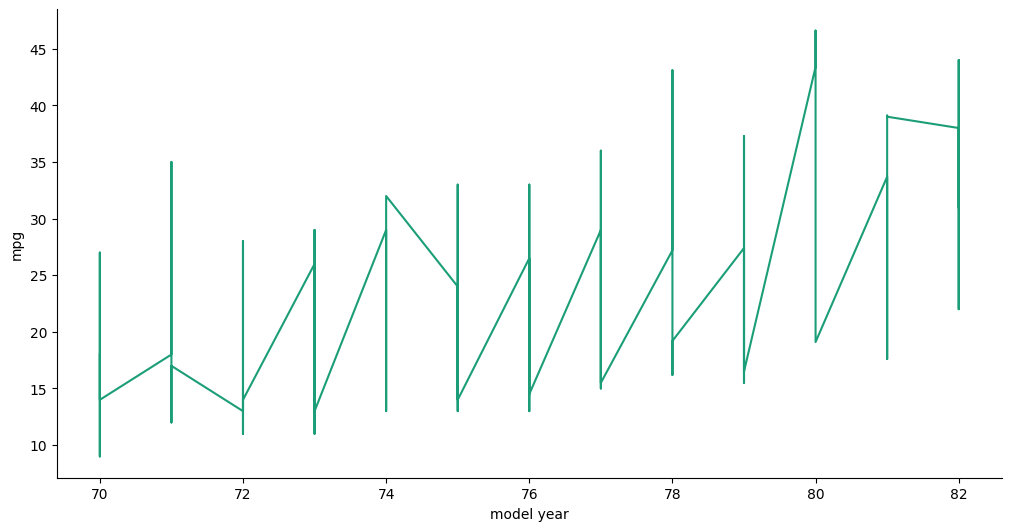

In [ ]:
# @title model year vs mpg

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['model year']
  ys = series['mpg']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('model year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('model year')
_ = plt.ylabel('mpg')

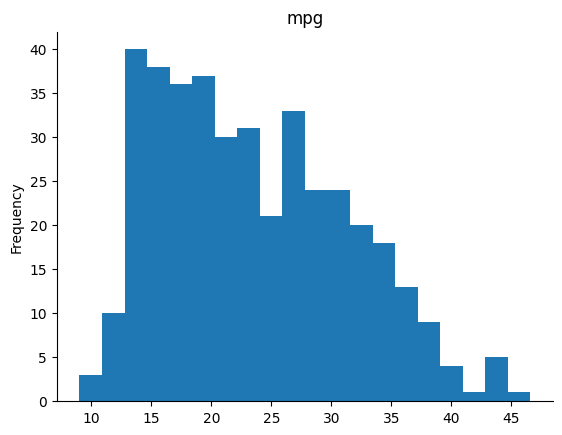

In [ ]:
# @title mpg

from matplotlib import pyplot as plt
data['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Check the info of the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Check the unique values in the 'car name' column**

In [ ]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [ ]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Check values in the horsepower column**

In [ ]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column.
- First, we need to **replace the ? with np.nan**.

In [ ]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [ ]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

- Check the summary statistics of the data

In [ ]:
# Calculate summary statistics
summary_stats = data.describe()
print(summary_stats)


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


Observations:Mean = average / low std = data is close to the avg / high std = data is far from avg / min = lowest in set / max = highest
          
            mpg   cylinders   displacement  hp        weight  
mean    23.514573    5.454774    193.425879  104.304020  2970.424623   
std      7.815984    1.701004    104.269838   38.222625   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000    
50%     23.000000    4.000000    148.500000   93.500000  2803.500000     
max     46.600000    8.000000    455.000000  230.000000  5140.000000x

          acceleration  model_yr
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000      
max       24.800000   82.000000  



-mpg std is low in comparison to the mean = reliable fuel efficiency
-a higher number of cylinders in an engine is associated with improved performance and smoother operation - avg = 5.45 with 50% being at least a 4 cyl
-Higher mean displacement generally correlates with higher power output and torque (max at 455 and 50% at 148 with a min of 68 / lower power output preferred)
- A lower standard deviation suggests more consistent engine performance
It can affect the predictability of fuel efficiency and power delivery / std is about 1/2 of avg
-avg hp 104.3 / 50% 93.5
-weight has avg at 2970 /  50% at 2803
-acceleration avg is 15.56 with a max of 24 so fast accel is pref
-model yr ave is 76 with max of 82 and min of 70 so older model yr is preferred

### **Check the distribution and outliers for each column in the data**

- Create histograms to check the distribution of all the variables
- Create boxplots to visualize the outliers for all the variables

mpg
Skew : 0.46


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

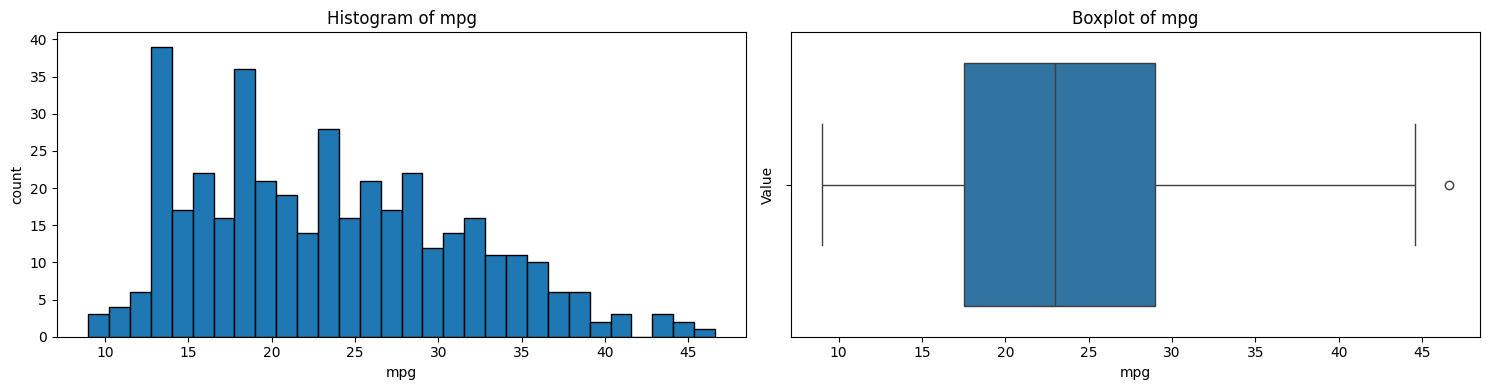

cylinders
Skew : 0.53


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

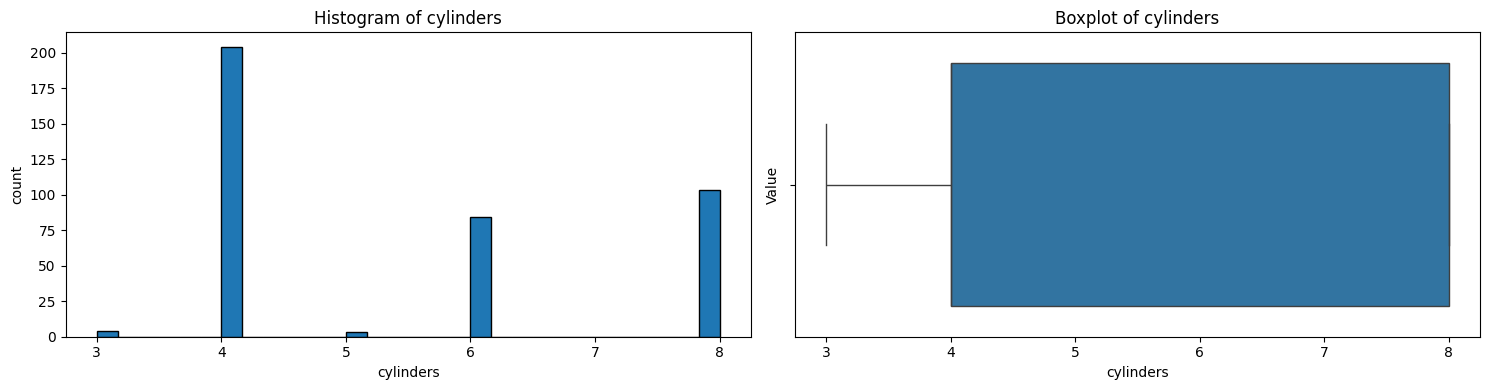

displacement
Skew : 0.72


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

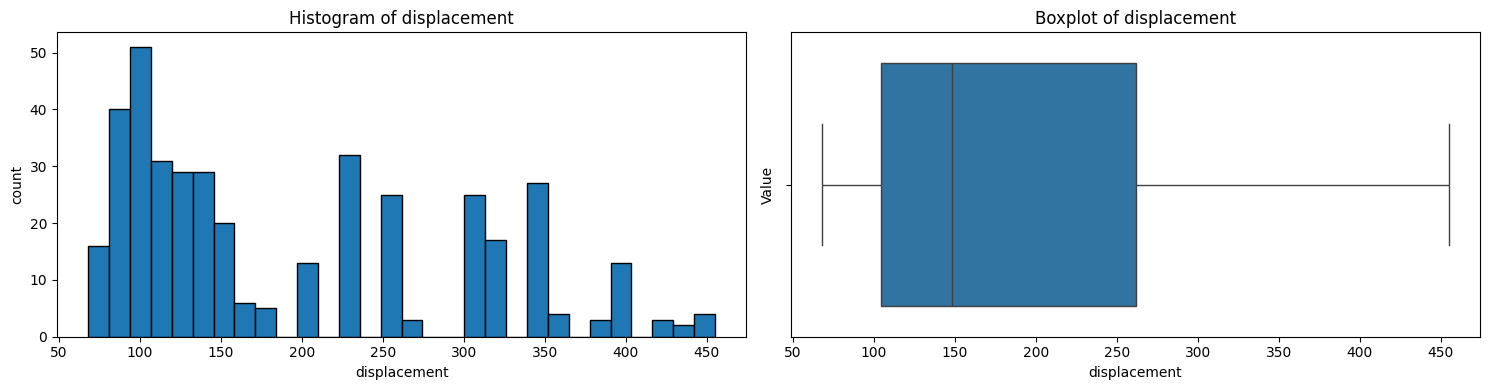

horsepower
Skew : 1.11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

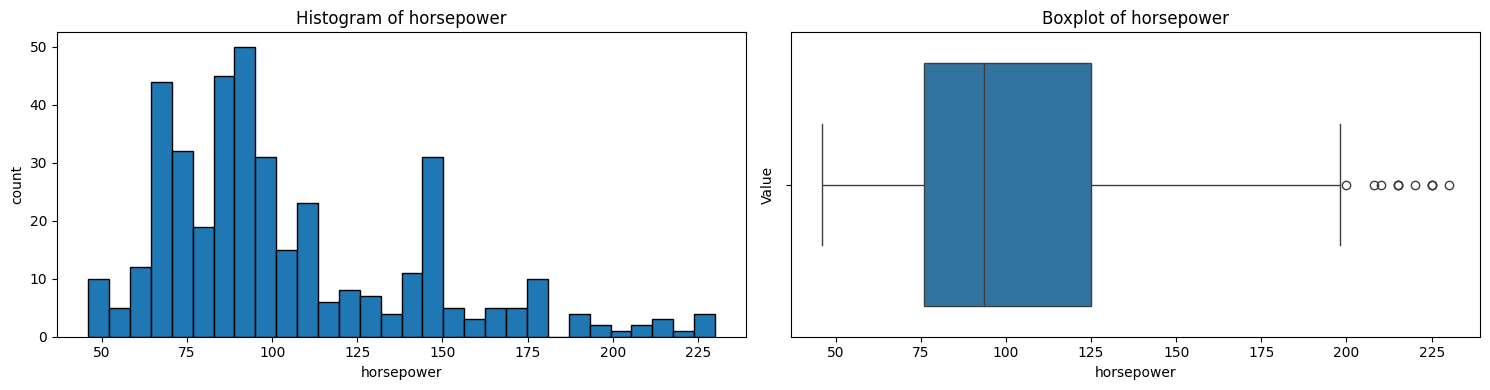

weight
Skew : 0.53


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

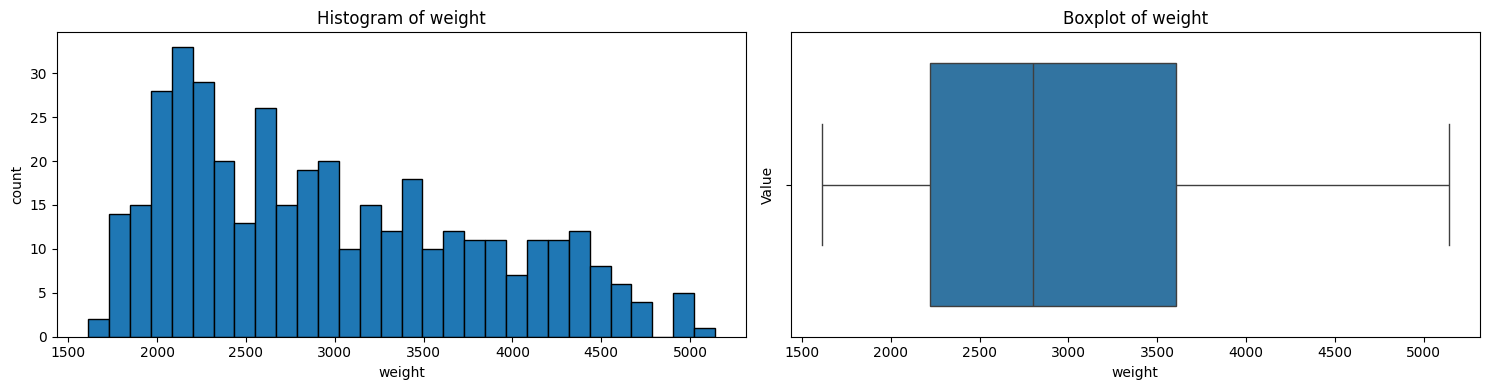

acceleration
Skew : 0.28


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

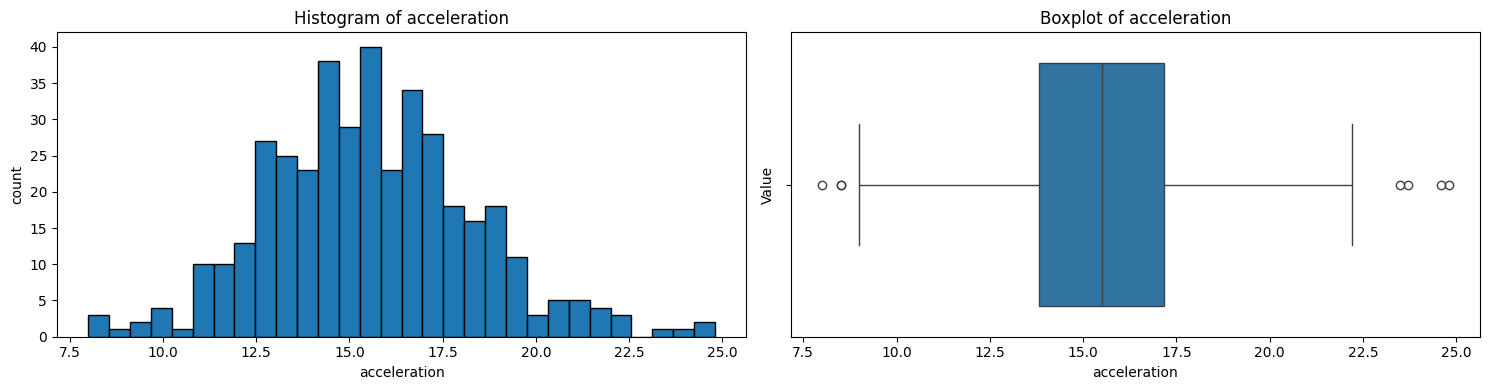

model year
Skew : 0.01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

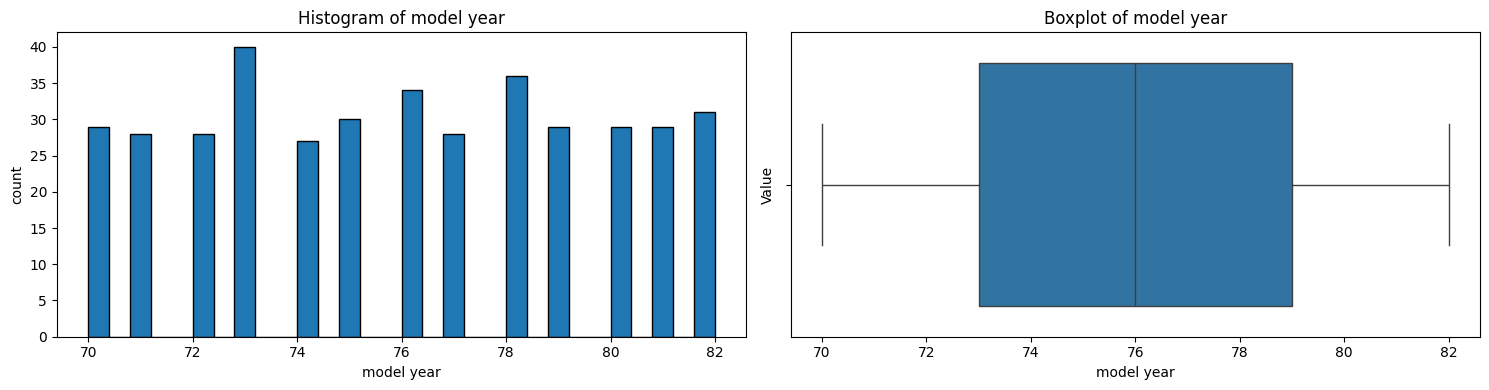

In [ ]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    #create histogram for each column
    plt.hist(data[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('count')

    # Set the title dynamically based on the column name
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)

    #create a boxplot for each column
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.ylabel('Value')

    # Set the title dynamically based on the column name
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()

    # Save as PNG with 300 dpi for high quality - because they are side by side only need name of one of them
    plt.savefig(f'Histogram of {col}.png', dpi=300)


    from google.colab import files
    # Replace with your file name
    files.download(f'Histogram of {col}.png')


    plt.show()

MPG
histogram: skewed to left (lower mgp) largest amount of data in the 13 and 18 mpg (13 falls outside boxplot 25% but holds lgst amt of data)  
boxplot 25-75%: mpg = 17 - 29 / 23 avg

CYLINDERS
histogram: 4 most of data / 125-175, 225-275, 320-340 had good amount of data - consider as secondary categories of market
boxplot: 4-8 range heavy

DISPLACEMENT
histogram: 100 most of data
boxplot: 100-225 median lower / lower end skewed

HORSEPOWER
histogram:65 & 85 held alot of data w/ 90 having most - 145 is an outlier with fair amount of data / other outliers are insignificant numbers
boxplot:75-125 lower end skewed / median lower

WEIGHT
histogram:2200 held most of data
boxplot: 2200 - 3600 lower end skew / avg on lower

ACCELERATION
histogram: bulk of data falls in this center range
boxplot: balanced 14-17 range / avg in middle

MODEL YEAR
histogram: evenly distributed 73 most / 78 & 76 equally next
boxplot: completely symmetrical with 76 as average

### **Check the correlation**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

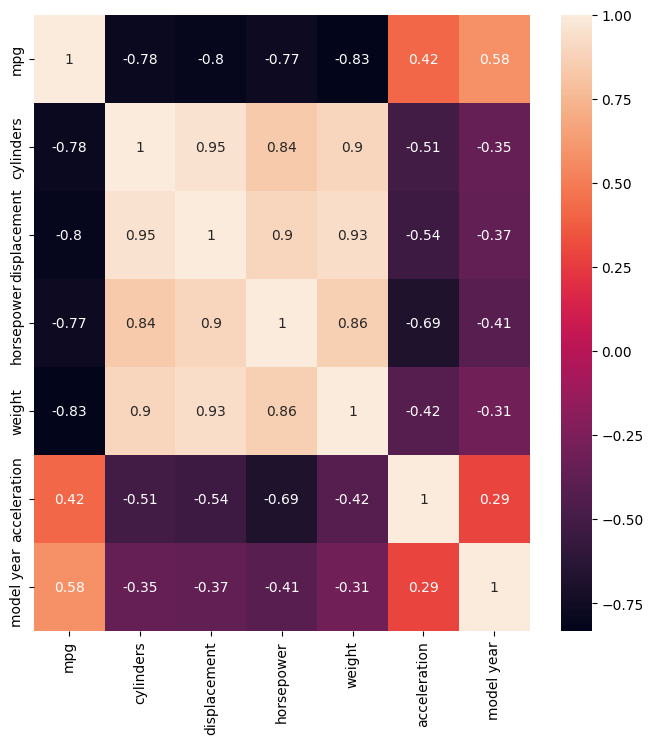

In [ ]:
plt.figure(figsize = (8, 8))
num_cols = data.select_dtypes(include = "number").columns.to_list()
sns.heatmap(data[num_cols].corr(), annot = True)

# Save as PNG with 300 dpi for high quality - because they are side by side only need name of one of them
plt.savefig(f'heatmap of data[num_cols].corr(), annot = True).png', dpi=300)


from google.colab import files
# Replace with your file name
files.download(f'heatmap of data[num_cols].corr(), annot = True).png')
plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scale the data**

In [ ]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# Round to 2 decimal places
data_scaled = data_scaled.round(2)

In [ ]:
data_scaled.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.71,1.5,1.09,0.67,0.63,-1.30,-1.63
1,-1.09,1.5,1.50,1.59,0.85,-1.48,-1.63
2,-0.71,1.5,1.20,1.20,0.55,-1.66,-1.63
3,-0.96,1.5,1.06,1.20,0.55,-1.30,-1.63
4,-0.83,1.5,1.04,0.94,0.57,-1.84,-1.63


## **Principal Component Analysis**

#### **Apply the PCA algorithm with number of components equal to the total number of columns in the data**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components=n, random_state=1)

# Fit and transform the pca function on scaled data
data_pca1 = pca.fit_transform(data_scaled)

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

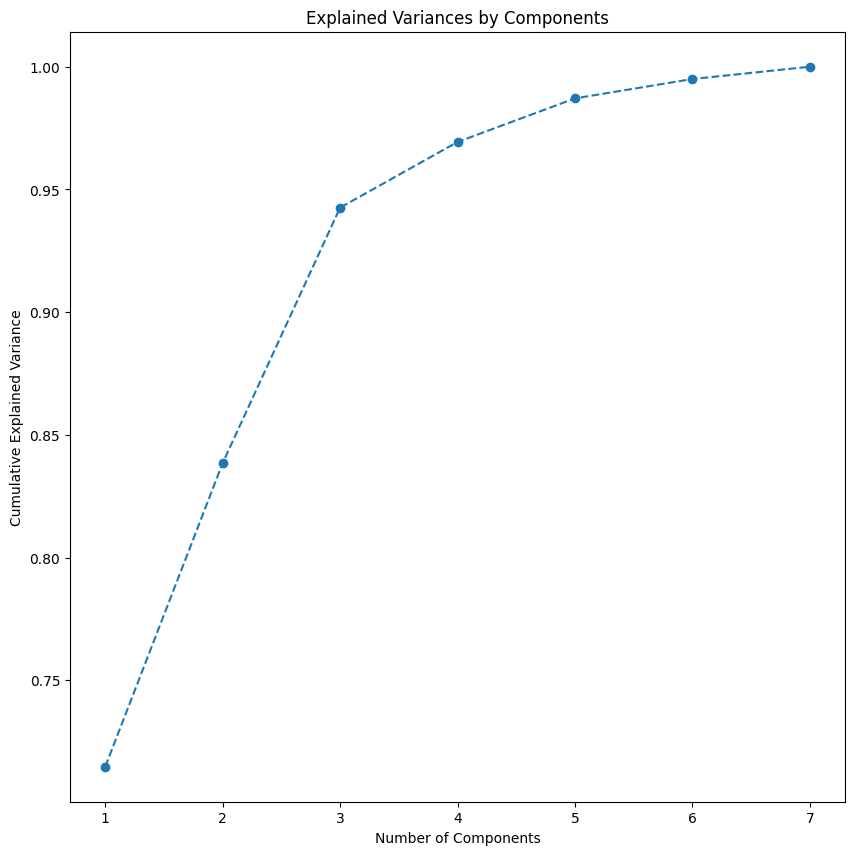

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


In [ ]:
#access the loadings that went into the PC groupings
loadings = pca.components_

#PC1,2 and 3 loadings details
pc1_loadings = loadings[0]
pc2_loadings = loadings[1]
pc3_loadings = loadings[2]


#make a dataframe
loadings_data = pd.DataFrame({
    'PC1 Loadings': pc1_loadings,
    'PC2 Loadings': pc2_loadings,
    'PC3 Loadings': pc3_loadings
}, index=data.columns)

#sort the values
loadings_data.sort_values('PC1 Loadings', ascending=False, inplace=True)
loadings_data.sort_values('PC2 Loadings', ascending=False, inplace=True)
loadings_data.sort_values('PC3 Loadings', ascending=False, inplace=True)


print(loadings_data)

              PC1 Loadings  PC2 Loadings  PC3 Loadings
acceleration     -0.284741     -0.024603      0.892732
weight            0.414089      0.221482      0.279512
cylinders         0.417246      0.192019      0.141058
displacement      0.429315      0.177656      0.103334
model year       -0.229556      0.910532     -0.017572
horsepower        0.422181      0.090036     -0.167806
mpg              -0.397637      0.211502     -0.256632


In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3
mpg,-0.40,0.21,-0.26
cylinders,0.42,0.19,0.14
displacement,0.43,0.18,0.10
horsepower,0.42,0.09,-0.17
weight,0.41,0.22,0.28
acceleration,-0.28,-0.02,0.89
model year,-0.23,0.91,-0.02


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [ ]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.map(color_high)

,PC1,PC2,PC3
mpg,-0.400000,0.210000,-0.260000
cylinders,0.420000,0.190000,0.140000
displacement,0.430000,0.180000,0.100000
horsepower,0.420000,0.090000,-0.170000
weight,0.410000,0.220000,0.280000
acceleration,-0.280000,-0.020000,0.890000
model year,-0.230000,0.910000,-0.020000


high mpg = low PC1
high cylinder, displacement, horsepower, weight = high PC1
high model year = high pc2
high acceleration = high pc3

#### Visualize the data in 2 dimensions using the first two principal components

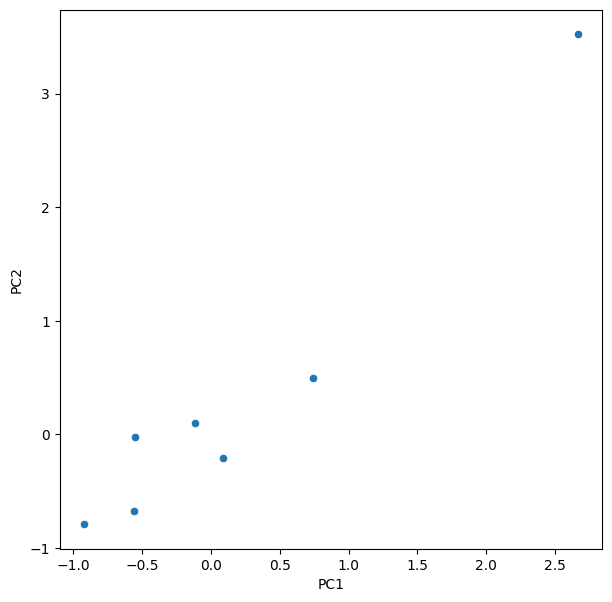

In [ ]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Add hue to the scatter plot**

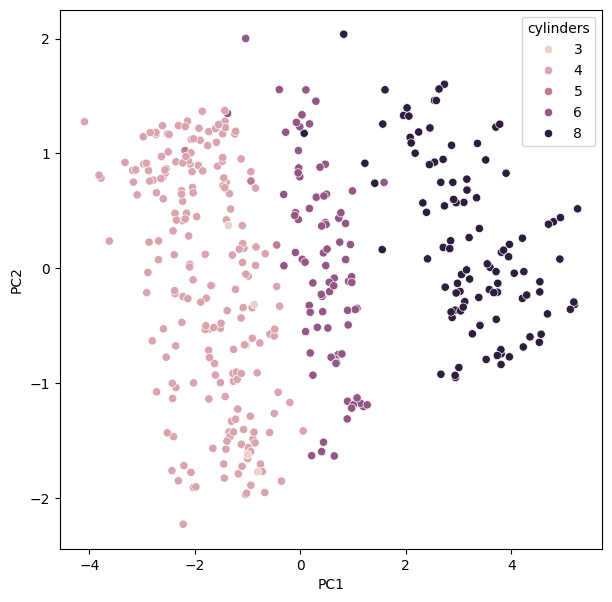

In [ ]:
df_concat = pd.concat([pd.DataFrame(data_pca1), data['cylinders']], axis=1)

plt.figure(figsize = (7, 7))

# Create a scatter plot with x = 0 and y = 1 using df_concat dataframe
sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = df_concat['cylinders'])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

for PC1, cylinders was one of our higly correlated features. Here we can see the 7 features in the data set track in a positive relationship to the increasing number of cylinders. We have a few features which track a positive correlation and are similar and a grouping we can potentially consider outliers and appear to not be similar to the cylinder feature, yet they still maintain the positive upward correlation trend relative to the cylinder count.  

## **t-SNE**

In [ ]:
# Apply the t-SNE algorithm with random_state = 1
tsne = TSNE(random_state=1)

# Fit and transform t-SNE function on the scaled data
data_tsne = tsne.fit_transform(data_scaled)

In [ ]:
data_tsne.shape

(398, 2)

In [ ]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne.head()

,Component 1,Component 2
0,37.719212,-5.063564
1,38.616646,-3.128951
2,38.446995,-4.234093
3,37.827194,-4.243647
4,38.443333,-4.735901


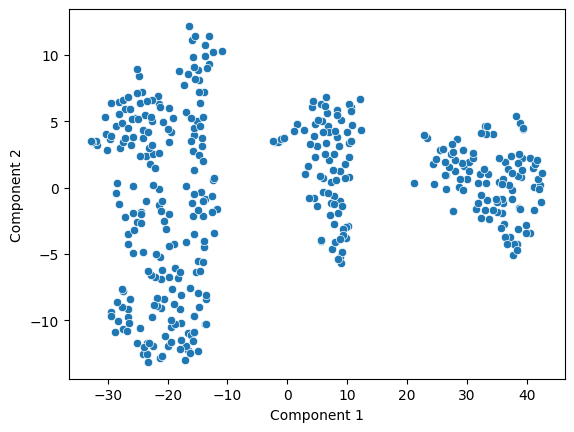

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

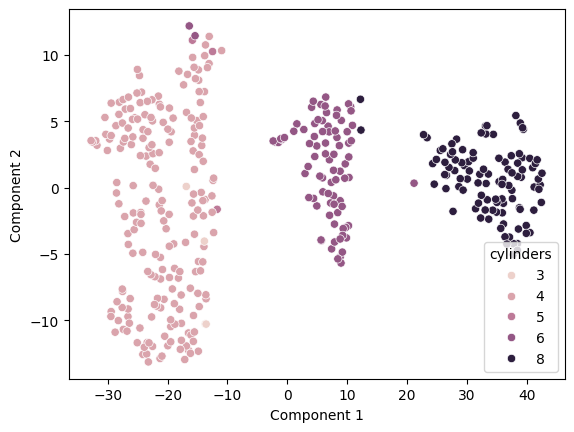

In [ ]:
# Scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

This t-SNE scatter plot is also looking at the number of cylinders. We can see that with the 3 & 4 cylinder grouping, there are more similar features than with the other number of cylinders.

In [ ]:
# Assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']

    second_component = x['Component 2']

    if (first_component > 0) and (second_component > -5):
        return 'group_1'

    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'

    else:
        return 'group_3'

data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

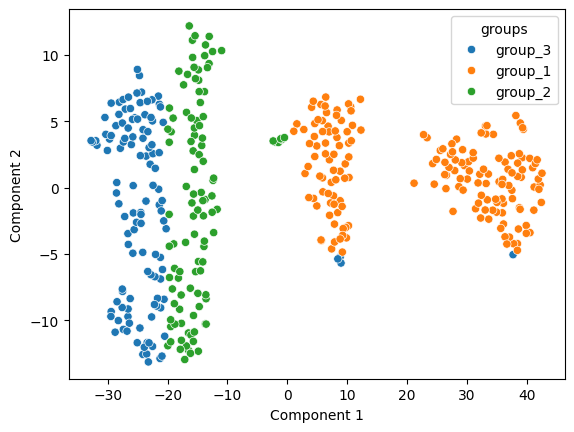

In [ ]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [ ]:
data['groups'] = data_tsne['groups']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

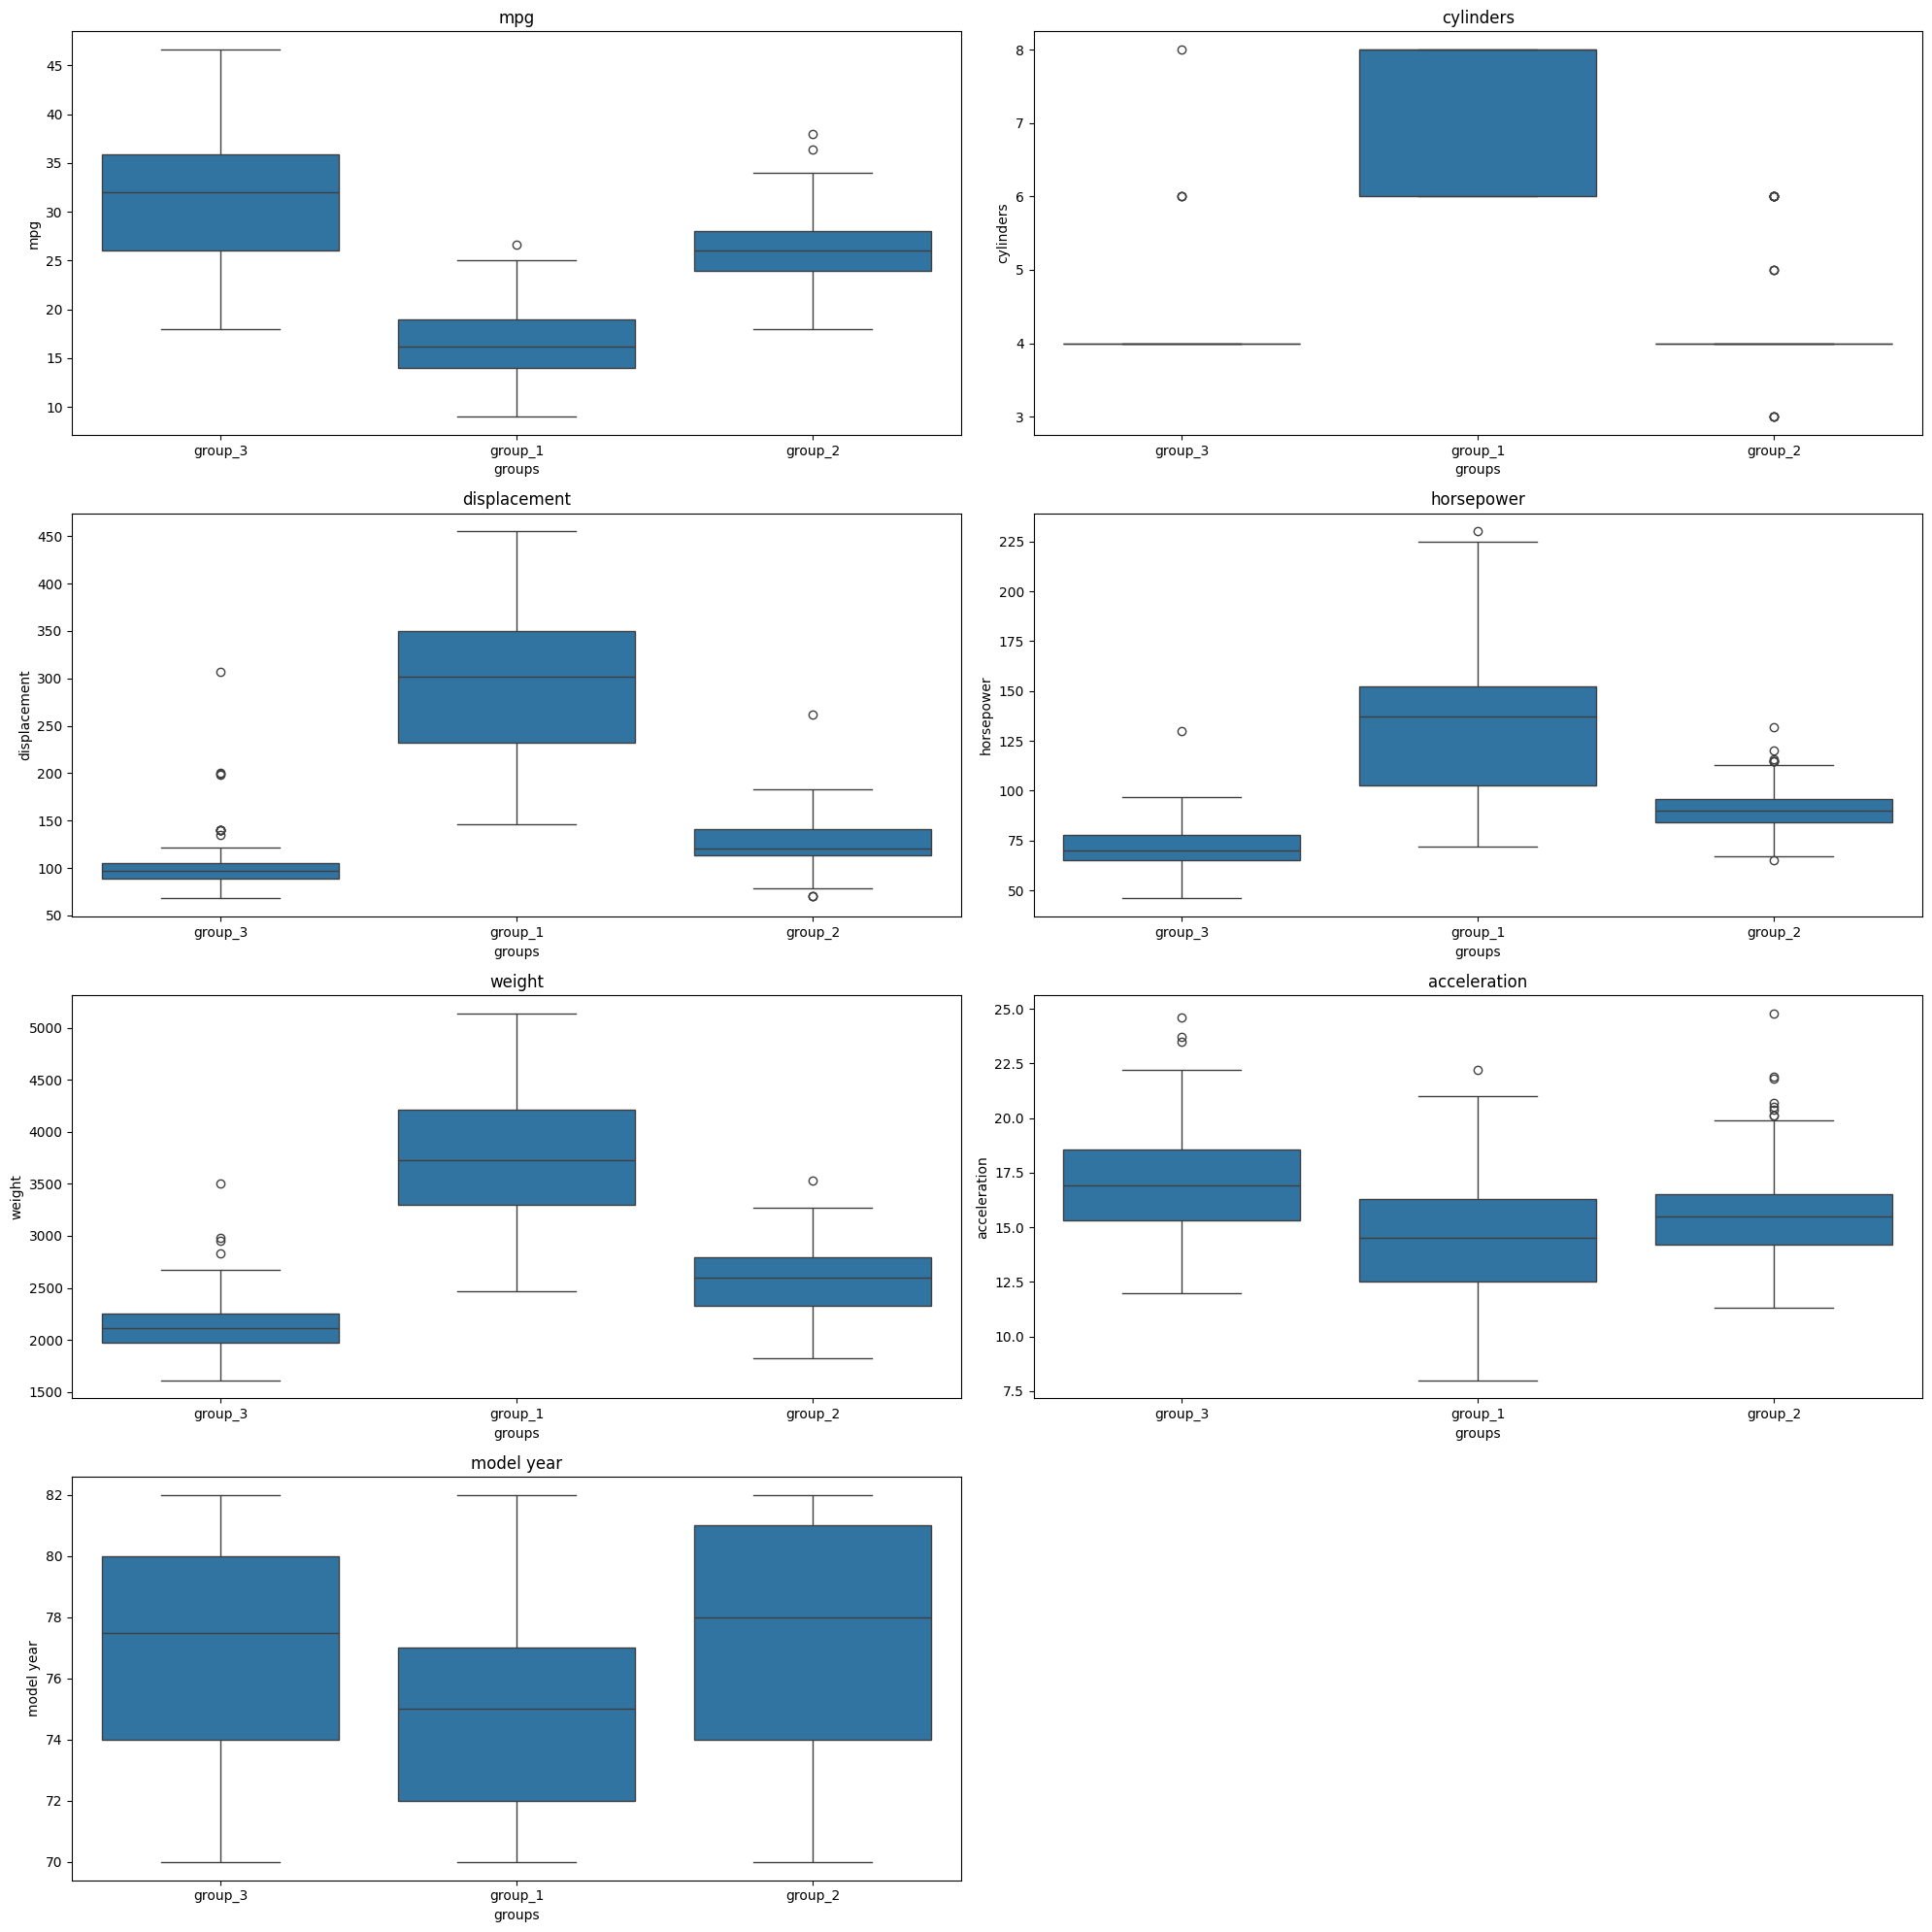

In [ ]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    sns.boxplot(x = 'groups', y = variable, data = data)

    plt.tight_layout()

    plt.title(variable)

# Save the figure as 'boxplots.png'
plt.savefig('boxplots.png')

#download boxplots
files.download ('boxplots.png')

plt.show()

These boxplots show the significance of a singular feature within one of three groups. These could be groupings of consumers.

Most significant for grouping greatest to least:
mpg -          group 3 / 2 / 1
cylinders -    group 1 / na / na
displacement - group 1 / 2 / 3
horsepower -   group 1 / 2 / 3
weight -       group 1 / 2 / 3
acceleration - group 3 / 2 / 1
model year -   group 2 / 3 / 1

Gp 1 greatest = cylinders, displacement, horsepower, weight
Gp 1 mid = na
Gp 1 low = mpg, acceleration, model year

Gp 2 greatest = model yr
Gp 2 mid = mpg, displacement, horsepower, weight, acceleration
gp 2 low = na

Gp 3 greatest = mpg, acceleration
Gp 3 mid = model year
Gp 3 low = displacement, horsepower, weight





## **Conclusion and Business Recommendations**

It was found that 3 Attributes comprise 90% of the data. Those are the Engine (which includes cylinder, displacement, and horsepower features) the Model Year, and Acceleration.

It is my recommendation for SecondLife to procure inventory of 4 types of cars in order to market to the consumer groups who purchase in these groups.

- Vintage muscle car of any model year, with the focus being on the engine power
- Classic vintage model muscle cars
- Vintage cruisers
- Newer model vintage cars which offer good gas mileage in relation to the model year

After procurement, in order to bring consumer awareness to the new line of Vintage offerings at SecondLife, I suggest launching a marketing campaign to past purchasers.

A good strategy would be to host a Car Show.
One key aspect of the marketing strategy would be to invite past customers to bring their Vintage cars to SecondLIfe’s Car Show.
